In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
train = pd.read_csv(r"C:\Users\hp\Desktop\own\Logistic Regression\Chemicals Segregation\Train\Logistic_XY_Train.csv")
test=pd.read_csv(r"C:\Users\hp\Desktop\own\Logistic Regression\Chemicals Segregation\Test\Logistic_X_Test.csv")

In [3]:
train=np.asarray(train)
test=np.asarray(test)

In [4]:
x=train[:,:3] #Extracting all the 3 features
y=train[:,3]#Extracting the output
xtest=test[:,:3]

In [5]:
print(x.shape,y.shape)

(3000, 3) (3000,)


In [6]:
class LogisticRegression:
    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.coef = np.random.uniform(low=-1, high=1, size=(self.X.shape[1], ))
        self.bias = np.random.random()
        
    
    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))
    
    def hypothesis(self, x):
        return LogisticRegression.sigmoid(self.coef.dot(x) + self.bias)
    
    def predict(self, x):
        hx = self.hypothesis(x)
        if hx < 0.5:
            return 0
        else:
            return 1
        
    def compute_loss(self):
        # L = ylog(yhat) + (1-y)(log(1 - yhat))
        # In our case, substitute yhat with hypothesis()
        
        log_loss = 0
        for x,y in zip(self.X, self.y):
            yhat = self.hypothesis(x)
            loss = (y * np.log(yhat + 1e-03)) + (1 - y)*(np.log(1 - yhat + 1e-03))
            log_loss += loss
            
        neg_log_likelihood = -log_loss
        
        return neg_log_likelihood
    
    def accuracy(self, test, true_labels):
        preds = []
        for x in test:
            preds.append(self.predict(x))
        preds = np.array(preds)
        return (preds == true_labels).sum() / preds.shape[0]
    
    def apply_gradient_descent(self, learning_rate=0.01):
        
        # Compute Gradients
        gradients = np.zeros_like(self.coef)
        grad_00 = 0
        
        for i in range(self.X.shape[0]):
            xi = self.X[i]
            gradients += (self.hypothesis(xi) - self.y[i]) * xi
            grad_00 += (self.hypothesis(xi) - self.y[i])
        
        # Update Weights
        self.coef -= learning_rate * gradients
        self.bias -= learning_rate * grad_00
        
    
    def train(self, losses, iterations=1, lr=0.01):
        for _ in range(iterations):
            self.apply_gradient_descent(lr)
            losses.append(self.compute_loss())
            
        return losses
    
    

In [7]:
logreg = LogisticRegression(x, y)
losses = [logreg.compute_loss()]

In [8]:
losses

[1420.0555236761652]

In [9]:
losses = logreg.train(losses, 10)

Accuracy: 0.9896666666666667


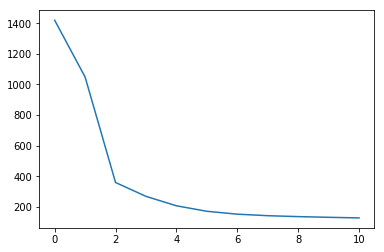

In [10]:
print("Accuracy:", logreg.accuracy(x, y))
# print(logreg.coef)
# print(logreg.bias)

plt.figure()
plt.plot(losses)
plt.show()

In [11]:
predictions = []
for x in test:
    predictions.append(logreg.predict(x))
predictions= np.array(predictions)

In [12]:
predictions

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [13]:
df = pd.DataFrame({"y" : predictions})      #prediction of value for the Test.csv and storing in the result.csv file
df.to_csv("result.csv", index=False)